### The given project is to find the happiness of each country given 6 socio-economic features where the data is re released at the United Nations at an event celebrating International Day of Happiness. 

### The report indicates organizations use happiness indicators to inform their policy-making decisions.

In [774]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

In [569]:
folderName = 'UN Countries Happiness Metircs'

### The given folder contains the data of happiness from 2015 to 2019

In [570]:
datafiles = os.listdir(folderName)

In [571]:
datafiles

['2015.csv', '2016.csv', '2017.csv', '2018.csv', '2019.csv']

In [572]:
filename = folderName+'/'+datafiles[4]

In [573]:
data = pd.read_csv(filename)

In [574]:
data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### The 6 social factors to indicate the happiness in a given country are economic production, social support, life expectancy, freedom, absence of corruption, and generosity


In [575]:
files_data = []
for file in datafiles:
    filename = folderName+'/'+file
    filedata = pd.read_csv(filename)
    files_data.append(filedata)
    print('Shape of {} is {}'.format(file,filedata.shape))

Shape of 2015.csv is (158, 12)
Shape of 2016.csv is (157, 13)
Shape of 2017.csv is (155, 12)
Shape of 2018.csv is (156, 9)
Shape of 2019.csv is (156, 9)


In [576]:
# It means the number of attributes are not identical for some of the files
for datafile in files_data:
    print(list(datafile.columns))
    print('\n')

['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']


['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']


['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual']


['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']


['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life e

In [577]:
#Since the names are very different in each file, we can rename them and drop the unnecessary columns

new_column_names = {'Country or region':'Country', 'Happiness Rank': 'HappinessRank','HapppinessRank': 'HappinessRank','Happiness.Rank': 'HappinessRank', 'Overall rank': 'HappinessRank',
                    'Happiness Score':'HappinessScore', 'Happiness.Score':'HappinessScore', 'Score':'HappinessScore',  
                    'Economy (GDP per Capita)': 'EconomicSupport', 'Economy..GDP.per.Capita.': 'EconomicSupport', 'GDP per capita': 'EconomicSupport',
                    'Family': 'SocialSupport','Social support': 'SocialSupport',
                    'Health (Life Expectancy)': 'Health', 'Health..Life.Expectancy.': 'Health', 'Healthy life expectancy': 'Health',
                    'Freedom to make life choices': 'Freedom', 'Perceptions of corruption': 'Corruption', 'Trust..Government.Corruption.': 'Corruption',
                    'Trust (Government Corruption)': 'Corruption'
                   }

In [578]:
new_column_names

{'Country or region': 'Country',
 'Happiness Rank': 'HappinessRank',
 'HapppinessRank': 'HappinessRank',
 'Happiness.Rank': 'HappinessRank',
 'Overall rank': 'HappinessRank',
 'Happiness Score': 'HappinessScore',
 'Happiness.Score': 'HappinessScore',
 'Score': 'HappinessScore',
 'Economy (GDP per Capita)': 'EconomicSupport',
 'Economy..GDP.per.Capita.': 'EconomicSupport',
 'GDP per capita': 'EconomicSupport',
 'Family': 'SocialSupport',
 'Social support': 'SocialSupport',
 'Health (Life Expectancy)': 'Health',
 'Health..Life.Expectancy.': 'Health',
 'Healthy life expectancy': 'Health',
 'Freedom to make life choices': 'Freedom',
 'Perceptions of corruption': 'Corruption',
 'Trust..Government.Corruption.': 'Corruption',
 'Trust (Government Corruption)': 'Corruption'}

In [579]:
all_column_names = []
for i,datafile in enumerate(files_data):
    datafile = datafile.rename(columns=new_column_names)
    files_data[i] = datafile
    all_column_names.extend(datafile.columns)

In [580]:
# It means the number of attributes are not identical for some of the files
unique_columns = set(all_column_names)

In [581]:
field_names = {'Country','HappinessRank','HappinessScore', 'EconomicSupport', 'SocialSupport', 'Health', 'Freedom','Corruption'}

In [582]:
final_fields = list(set.intersection(unique_columns, field_names))

In [583]:
for i,data in enumerate(files_data):
    files_data[i] = data[final_fields]

In [584]:
for file in files_data:
    print(list(file.columns))

['HappinessRank', 'HappinessScore', 'EconomicSupport', 'SocialSupport', 'Country', 'Health', 'Freedom', 'Corruption']
['HappinessRank', 'HappinessScore', 'EconomicSupport', 'SocialSupport', 'Country', 'Health', 'Freedom', 'Corruption']
['HappinessRank', 'HappinessScore', 'EconomicSupport', 'SocialSupport', 'Country', 'Health', 'Freedom', 'Corruption']
['HappinessRank', 'HappinessScore', 'EconomicSupport', 'SocialSupport', 'Country', 'Health', 'Freedom', 'Corruption']
['HappinessRank', 'HappinessScore', 'EconomicSupport', 'SocialSupport', 'Country', 'Health', 'Freedom', 'Corruption']


### Finally when all of our data files have same column names, we can concatenate them to get one dataframe

### Before that, we can do some EDA to see the top 5 and bottom 5 countries over the course of last 5 years

In [585]:
files_data[0].HappinessScore[:5]

0    7.587
1    7.561
2    7.527
3    7.522
4    7.427
Name: HappinessScore, dtype: float64

<BarContainer object of 5 artists>

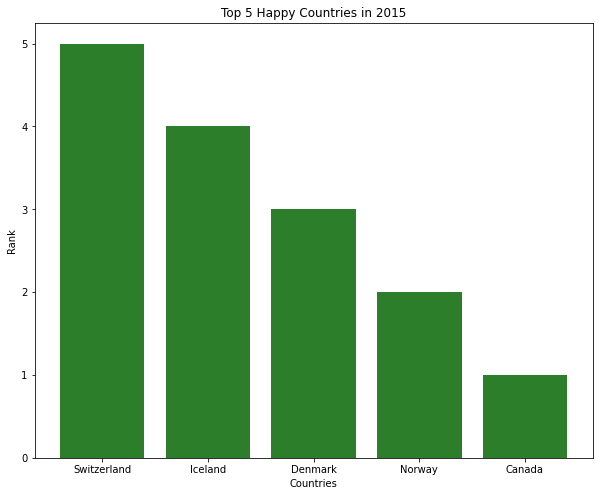

In [586]:
plt.figure(figsize = (10,8))
plt.title('Top 5 Happy Countries in 2015')
plt.xlabel('Countries')
plt.ylabel('Rank')
plt.bar(files_data[0].Country[:5],sorted(files_data[0].HappinessRank[:5], reverse=True), color='#2C7E2B')

<BarContainer object of 5 artists>

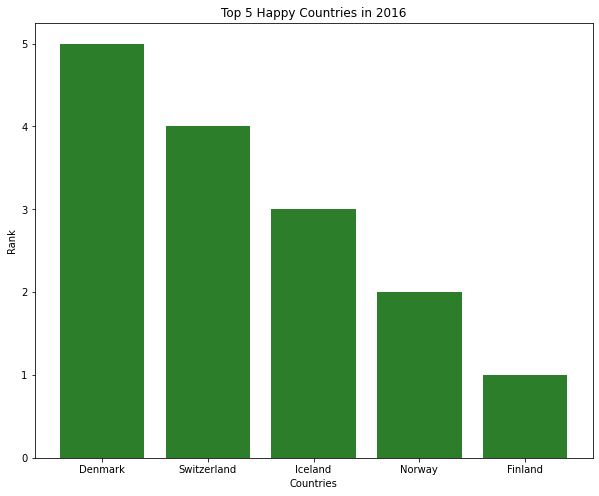

In [587]:
plt.figure(figsize = (10,8))
plt.title('Top 5 Happy Countries in 2016')
plt.xlabel('Countries')
plt.ylabel('Rank')
plt.bar(files_data[1].Country[:5],sorted(files_data[1].HappinessRank[:5], reverse=True), color='#2C7E2B')

<BarContainer object of 5 artists>

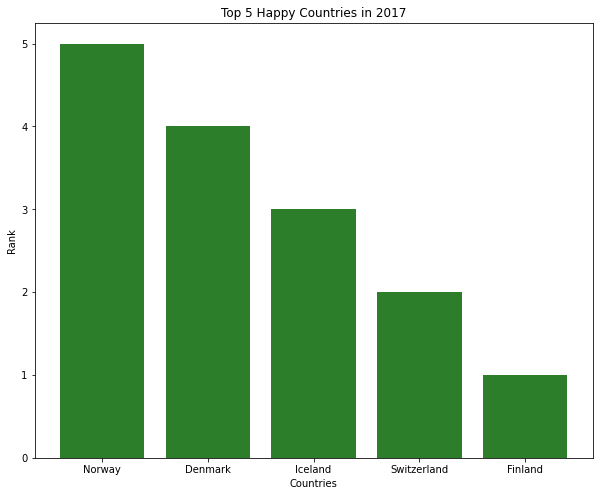

In [588]:
plt.figure(figsize = (10,8))
plt.title('Top 5 Happy Countries in 2017')
plt.xlabel('Countries')
plt.ylabel('Rank')
plt.bar(files_data[2].Country[:5],sorted(files_data[2].HappinessRank[:5], reverse=True), color='#2C7E2B')

<BarContainer object of 5 artists>

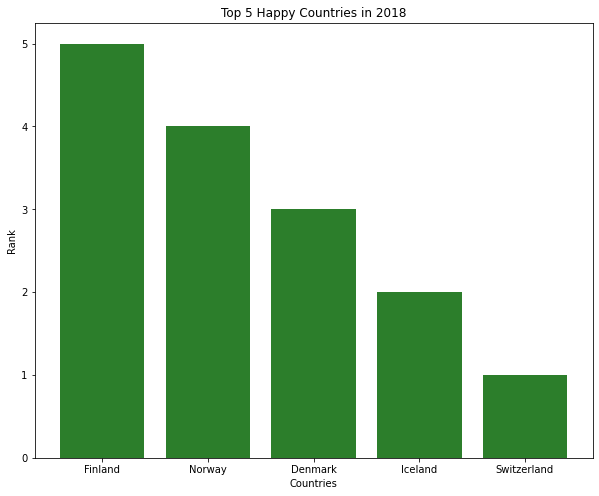

In [589]:
plt.figure(figsize = (10,8))
plt.title('Top 5 Happy Countries in 2018')
plt.xlabel('Countries')
plt.ylabel('Rank')
plt.bar(files_data[3].Country[:5],sorted(files_data[3].HappinessRank[:5], reverse=True), color='#2C7E2B')

<BarContainer object of 5 artists>

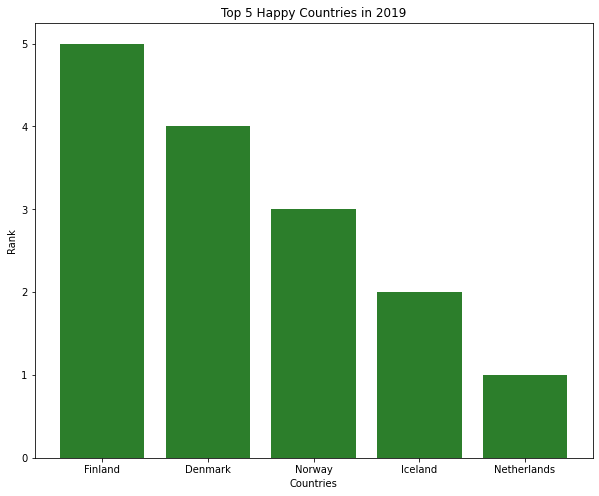

In [590]:
plt.figure(figsize = (10,8))
plt.title('Top 5 Happy Countries in 2019')
plt.xlabel('Countries')
plt.ylabel('Rank')
plt.bar(files_data[4].Country[:5],sorted(files_data[4].HappinessRank[:5], reverse=True), color='#2C7E2B')

### These bar charts gives us insights about the dynamics of happiness score in each country and that which countries alway appear in the top 5 countries i.e. Iceland, Denmark and Norway always remian to be the happies Countries


### In the same way, we can plot the bar charts for the least 5 happy countries

<BarContainer object of 5 artists>

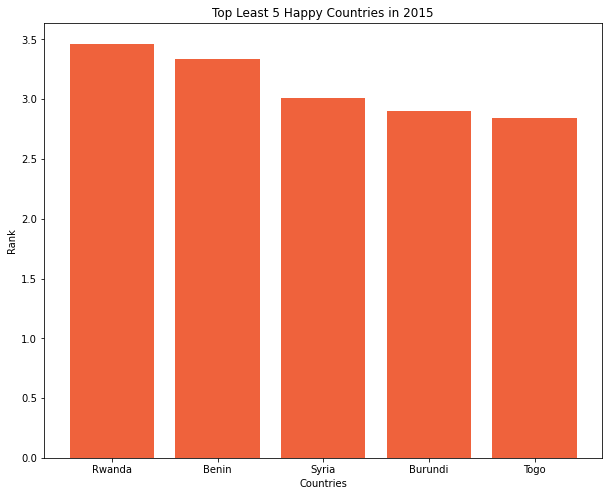

In [591]:
plt.figure(figsize = (10,8))
plt.title('Top Least 5 Happy Countries in 2015')
plt.xlabel('Countries')
plt.ylabel('Rank')
plt.bar(files_data[0].Country[-5:],sorted(files_data[0].HappinessScore[-5:], reverse=True), color='#EF623C')

<BarContainer object of 5 artists>

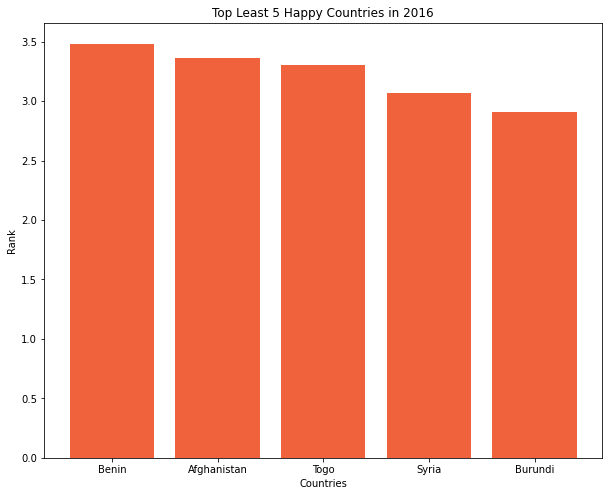

In [592]:
plt.figure(figsize = (10,8))
plt.title('Top Least 5 Happy Countries in 2016')
plt.xlabel('Countries')
plt.ylabel('Rank')
plt.bar(files_data[1].Country[-5:],sorted(files_data[1].HappinessScore[-5:], reverse=True), color='#EF623C')

<BarContainer object of 5 artists>

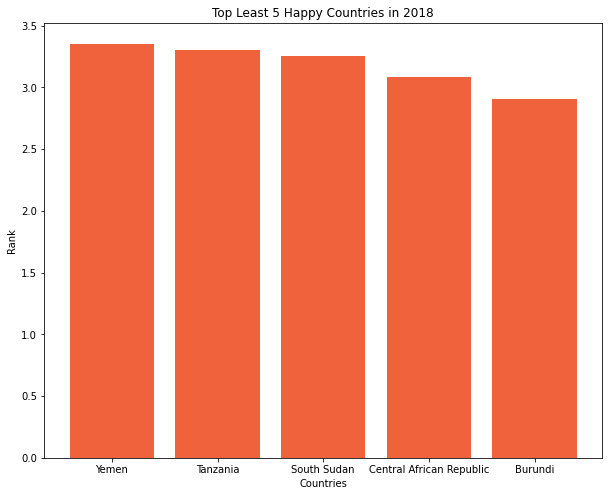

In [593]:
plt.figure(figsize = (10,8))
plt.title('Top Least 5 Happy Countries in 2018')
plt.xlabel('Countries')
plt.ylabel('Rank')
plt.bar(files_data[3].Country[-5:],sorted(files_data[3].HappinessScore[-5:], reverse=True), color='#EF623C')

### From here we can interpret that Burundi has always been in the least happy countries


### Analyzing metrics behind continous happiness in Norway

In [594]:
datafile_2015 = files_data[0]

In [595]:
norway_data = datafile_2015[datafile_2015['Country'] == 'Norway']
burundi_data = datafile_2015[datafile_2015['Country'] == 'Burundi']

In [596]:
list(norway_data['HappinessScore'])[0]

7.522

In [597]:
norway_data.head()

,HappinessRank,HappinessScore,EconomicSupport,SocialSupport,Country,Health,Freedom,Corruption
3,4,7.522,1.459,1.33095,Norway,0.88521,0.66973,0.36503


<BarContainer object of 5 artists>

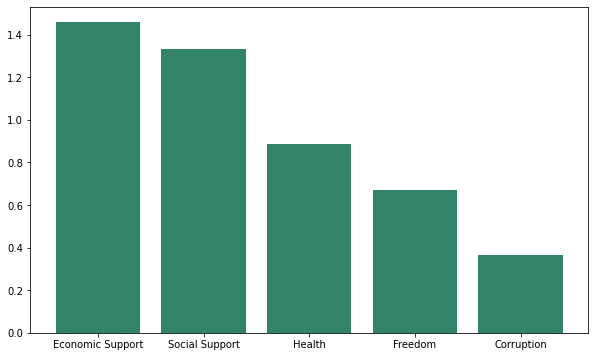

In [598]:
x = ['Economic Support', 'Social Support', 'Health', 'Freedom', 'Corruption']
y = [list(norway_data['EconomicSupport'])[0], list(norway_data['SocialSupport'])[0], list(norway_data['Health'])[0], list(norway_data['Freedom'])[0], list(norway_data['Corruption'])[0]]
plt.figure(figsize = (10,6))
plt.bar(x,y, color = '#318469')

<BarContainer object of 5 artists>

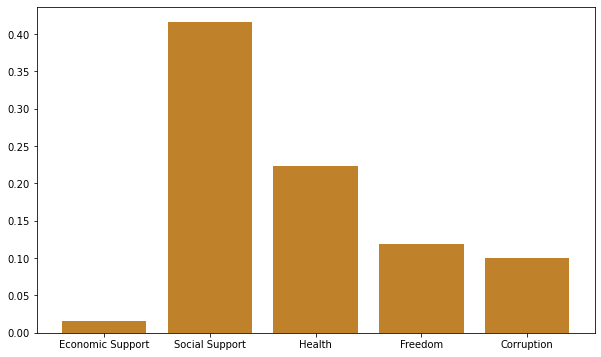

In [599]:
y = [list(burundi_data['EconomicSupport'])[0], list(burundi_data['SocialSupport'])[0], list(burundi_data['Health'])[0], list(burundi_data['Freedom'])[0], list(burundi_data['Corruption'])[0]]
plt.figure(figsize = (10,6))
plt.bar(x,y, color='#BF822A')

### These Statistics clearly shows the Effect of Economy on the happiness level

### Finally we can build the model which can predict the happiness score for each country given the socio-economic features

In [600]:
df = pd.concat(files_data)

In [601]:
df

,HappinessRank,HappinessScore,EconomicSupport,SocialSupport,Country,Health,Freedom,Corruption
0,1,7.587,1.39651,1.34951,Switzerland,0.94143,0.66557,0.41978
1,2,7.561,1.30232,1.40223,Iceland,0.94784,0.62877,0.14145
2,3,7.527,1.32548,1.36058,Denmark,0.87464,0.64938,0.48357
3,4,7.522,1.45900,1.33095,Norway,0.88521,0.66973,0.36503
4,5,7.427,1.32629,1.32261,Canada,0.90563,0.63297,0.32957
...,...,...,...,...,...,...,...,...
151,152,3.334,0.35900,0.71100,Rwanda,0.61400,0.55500,0.41100
152,153,3.231,0.47600,0.88500,Tanzania,0.49900,0.41700,0.14700
153,154,3.203,0.35000,0.51700,Afghanistan,0.36100,0.00000,0.02500
154,155,3.083,0.02600,0.00000,Central African Republic,0.10500,0.22500,0.03500


In [602]:
df.isnull().sum()

HappinessRank      0
HappinessScore     0
EconomicSupport    0
SocialSupport      0
Country            0
Health             0
Freedom            0
Corruption         1
dtype: int64

In [603]:
df.fillna(0, inplace=True)

In [604]:
df.drop(['HappinessRank'], axis=1, inplace=True)

In [605]:
df.head()

,HappinessScore,EconomicSupport,SocialSupport,Country,Health,Freedom,Corruption
0,7.587,1.39651,1.34951,Switzerland,0.94143,0.66557,0.41978
1,7.561,1.30232,1.40223,Iceland,0.94784,0.62877,0.14145
2,7.527,1.32548,1.36058,Denmark,0.87464,0.64938,0.48357
3,7.522,1.45900,1.33095,Norway,0.88521,0.66973,0.36503
4,7.427,1.32629,1.32261,Canada,0.90563,0.63297,0.32957


In [606]:
df.Country

0                   Switzerland
1                       Iceland
2                       Denmark
3                        Norway
4                        Canada
                 ...           
151                      Rwanda
152                    Tanzania
153                 Afghanistan
154    Central African Republic
155                 South Sudan
Name: Country, Length: 782, dtype: object

In [607]:
df['Country'] = pd.get_dummies(df['Country'], drop_first=True)

In [608]:
from sklearn.utils import shuffle
df = shuffle(df)

In [609]:
df.head()

,HappinessScore,EconomicSupport,SocialSupport,Country,Health,Freedom,Corruption
119,4.516,0.308000,0.939000,0,0.428000,0.382000,0.167000
44,6.078,1.279730,1.082680,0,0.703670,0.233910,0.029470
68,5.546,1.318570,0.706970,0,0.848800,0.295070,0.052280
119,4.433,0.549000,1.088000,0,0.457000,0.696000,0.065000
125,4.280,0.092102,1.229023,0,0.191407,0.235961,0.060241


In [610]:
df['HappinessScore']

119    4.516
44     6.078
68     5.546
119    4.433
125    4.280
       ...  
137    3.875
124    4.419
111    4.575
138    3.916
11     7.167
Name: HappinessScore, Length: 782, dtype: float64

In [611]:
X = df.drop(['HappinessScore'],axis=1)
y = df[['HappinessScore']]

In [612]:
from sklearn.model_selection import train_test_split

In [613]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)

In [802]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [803]:
model = RandomForestRegressor(n_estimators=100)

In [804]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [805]:
preds = model.predict(X_test)

In [806]:
from sklearn.metrics import r2_score

In [807]:
accuracy = r2_score(y_test,preds)

In [808]:
print('Accuracy for the mode is {}'.format(accuracy*100))

Accuracy for the mode is 79.133557869204


### Since the Accuracy is a little low, we can do hyper parameter optimization to get better accuracy

In [809]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [810]:
params_grid = {
    'n_estimators': [10,50,100,200],
    'max_depth':[2,5,10,50,100]
}


In [811]:
estimator = RandomizedSearchCV(model,params_grid, n_jobs=-1, cv=10)

In [812]:
estimator.fit(X_train, y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                             

In [813]:
estimator.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [814]:
final_model = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


In [815]:
final_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [816]:
preds = final_model.predict(X_test)

In [817]:
r2_score(y_test,preds)

0.7950670371134207

In [818]:
import pickle
model_file = open('UN_Countries_Happiness.pkl','wb')
pickle.dump(final_model,model_file)